# Оценка популярности бренда

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('brand_eat.csv', encoding='windows-1251')

## Необходимо оценить какой из бендов пользуется большей популярностью
Поскольку у нас есть конретный бизнес заказ, не необходимости изучать всю таблицу, достаточно части данных
 - tc - покупатель
 - art_sp - продукт, вес, бренд товара

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


### Данные сцеплены в колонке, так что необоходимо их разделить

In [6]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [7]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [8]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [9]:
brnad_name = 'MARAVILLA 500 G Store_Brand'

In [10]:
brnad_name.split(' ')[-1]

'Store_Brand'

###### Создаем новый столбец для бренда

In [11]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [12]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


###### Посчитаем количестно покупок каждого покупатель. Предположим, что для симпании к определенном бренду необходимо более 5 покупок.

In [13]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')
users_purchases

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


###### Выясним сколько уникальных бнедов покупает каждый покупатель.

In [14]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


###### Выявим любимый бенд ипосчитаем количество покупок для каждого покупателя

In [15]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False])\
    .groupby('user_id') \
    .head(1)\
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


###### Объединим ранее созданные таблицы, посмотрим сколько покупок всего сделал каждый покупать и какому бренду отдает предпочтение

In [16]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [17]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


###### Выявим пользователей пользующихся только 1 брендом, в конечном итоге им можно проводить специальные акции на товары этого бренда.

In [18]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


###### Выясним какой это бренд

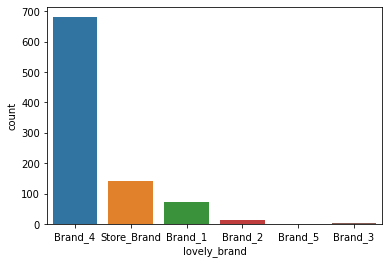

In [19]:
ax = sns.countplot(x="lovely_brand", data=loyal_users)